In [1171]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
%matplotlib inline 
sns.set(style="ticks")

In [1172]:
df = pd.read_csv('anime.csv')

In [1173]:
df.head()

,Rank,Name,Japanese_name,Type,Episodes,Studio,Release_season,Tags,Rating,Release_year,End_year,Description,Content_Warning,Related_Mange,Related_anime,Voice_actors,staff
0,1,Demon Slayer: Kimetsu no Yaiba - Entertainment...,Kimetsu no Yaiba: Yuukaku-hen,TV,NaN,ufotable,Fall,"Action, Adventure, Fantasy, Shounen, Demons, H...",4.60,2021.0,NaN,'Tanjiro and his friends accompany the Hashira...,Explicit Violence,Demon Slayer: Kimetsu no Yaiba,"Demon Slayer: Kimetsu no Yaiba, Demon Slayer: ...","Inosuke Hashibira : Yoshitsugu Matsuoka, Nezuk...","Koyoharu Gotouge : Original Creator, Haruo Sot..."
1,2,Fruits Basket the Final Season,Fruits Basket the Final,TV,13.0,TMS Entertainment,Spring,"Drama, Fantasy, Romance, Shoujo, Animal Transf...",4.60,2021.0,NaN,'The final arc of Fruits Basket.',"Emotional Abuse,, Mature Themes,, Physical Abu...","Fruits Basket, Fruits Basket Another","Fruits Basket 1st Season, Fruits Basket 2nd Se...","Akito Sohma : Maaya Sakamoto, Kyo Sohma : Yuum...","Natsuki Takaya : Original Creator, Yoshihide I..."
2,3,Mo Dao Zu Shi 3,The Founder of Diabolism 3,Web,12.0,B.C MAY PICTURES,NaN,"Fantasy, Ancient China, Chinese Animation, Cul...",4.58,2021.0,NaN,'The third season of Mo Dao Zu Shi.',NaN,Grandmaster of Demonic Cultivation: Mo Dao Zu ...,"Mo Dao Zu Shi 2, Mo Dao Zu Shi Q","Lan Wangji, Wei Wuxian, Jiang Cheng, Jin Guang...","Mo Xiang Tong Xiu : Original Creator, Xiong Ke..."
3,4,Fullmetal Alchemist: Brotherhood,Hagane no Renkinjutsushi: Full Metal Alchemist,TV,64.0,Bones,Spring,"Action, Adventure, Drama, Fantasy, Mystery, Sh...",4.58,2009.0,2010.0,"""The foundation of alchemy is based on the law...","Animal Abuse,, Mature Themes,, Violence,, Dome...","Fullmetal Alchemist, Fullmetal Alchemist (Ligh...","Fullmetal Alchemist: Brotherhood Specials, Ful...","Alphonse Elric : Rie Kugimiya, Edward Elric : ...","Hiromu Arakawa : Original Creator, Yasuhiro Ir..."
4,5,Attack on Titan 3rd Season: Part II,Shingeki no Kyojin Season 3: Part II,TV,10.0,WIT Studio,Spring,"Action, Fantasy, Horror, Shounen, Dark Fantasy...",4.57,2019.0,NaN,'The battle to retake Wall Maria begins now! W...,"Cannibalism,, Explicit Violence","Attack on Titan, Attack on Titan: End of the W...","Attack on Titan, Attack on Titan 2nd Season, A...","Armin Arlelt : Marina Inoue, Eren Jaeger : Yuu...","Hajime Isayama : Original Creator, Tetsurou Ar..."


In [1174]:
df.shape

(18495, 17)

In [1175]:
df.columns

Index(['Rank', 'Name', 'Japanese_name', 'Type', 'Episodes', 'Studio',
       'Release_season', 'Tags', 'Rating', 'Release_year', 'End_year',
       'Description', 'Content_Warning', 'Related_Mange', 'Related_anime',
       'Voice_actors', 'staff'],
      dtype='object')

In [1176]:
df.dtypes

Rank                 int64
Name                object
Japanese_name       object
Type                object
Episodes           float64
Studio              object
Release_season      object
Tags                object
Rating             float64
Release_year       float64
End_year           float64
Description         object
Content_Warning     object
Related_Mange       object
Related_anime       object
Voice_actors        object
staff               object
dtype: object

Обработаем пропуски  

In [1177]:
NA = pd.DataFrame(
    data=[
        df.isna().sum().tolist(),
        [
            "{:.2f}".format(i) + "%"
            for i in (df.isna().sum() / df.shape[0] * 100).tolist()
        ],
    ],
    columns=df.columns,
    index=["NA Count", "NA Percent"],
).T.sort_values(by="NA Count", ascending=False)
NA.style.background_gradient(cmap="seismic", subset=["NA Count"])

,NA Count,NA Percent
Content_Warning,16655,90.05%
End_year,15641,84.57%
Release_season,14379,77.75%
Related_Mange,10868,58.76%
Japanese_name,10557,57.08%
Episodes,8994,48.63%
Related_anime,8432,45.59%
Studio,6477,35.02%
staff,5490,29.68%
Voice_actors,3186,17.23%


In [1178]:
columns_to_replace = ['Japanese_name', 'Studio', 'Release_season' ]
for column in columns_to_replace:
    df[column] = df[column].fillna('unknown')

In [1179]:
NA = pd.DataFrame(
    data=[
        df.isna().sum().tolist(),
        [
            "{:.2f}".format(i) + "%"
            for i in (df.isna().sum() / df.shape[0] * 100).tolist()
        ],
    ],
    columns=df.columns,
    index=["NA Count", "NA Percent"],
).T.sort_values(by="NA Count", ascending=False)
NA.style.background_gradient(cmap="seismic", subset=["NA Count"])

,NA Count,NA Percent
Content_Warning,16655,90.05%
End_year,15641,84.57%
Related_Mange,10868,58.76%
Episodes,8994,48.63%
Related_anime,8432,45.59%
staff,5490,29.68%
Voice_actors,3186,17.23%
Rating,3131,16.93%
Tags,400,2.16%
Release_year,383,2.07%


In [1180]:
df.dropna(subset=['Tags', 'Description', 'Release_year', 'Episodes', 'Rating'],inplace = True,axis = 0 )

In [1181]:
df['End_year'] = df['End_year'].fillna(-1)

In [1182]:
columns_to_replace = ['Release_year', 'End_year', 'Episodes']
for column in columns_to_replace:
    df[column] = df[column].astype(int)

In [1183]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,8225.0,7308.253739,4535.397680,2.00,3249.00,7105.00,11254.00,17356.0
Episodes,8225.0,19.440486,35.771610,1.00,2.00,12.00,25.00,773.0
Rating,8225.0,3.386125,0.418772,0.96,3.15,3.39,3.64,4.6
Release_year,8225.0,2007.374833,11.951300,1961.00,2001.00,2011.00,2017.00,2021.0
End_year,8225.0,561.782006,900.641623,-1.00,-1.00,-1.00,1984.00,2022.0


In [1184]:
NA = pd.DataFrame(
    data=[
        df.isna().sum().tolist(),
        [
            "{:.2f}".format(i) + "%"
            for i in (df.isna().sum() / df.shape[0] * 100).tolist()
        ],
    ],
    columns=df.columns,
    index=["NA Count", "NA Percent"],
).T.sort_values(by="NA Count", ascending=False)
NA.style.background_gradient(cmap="seismic", subset=["NA Count"])

,NA Count,NA Percent
Content_Warning,6929,84.24%
Related_Mange,3532,42.94%
Related_anime,2998,36.45%
staff,1462,17.78%
Voice_actors,571,6.94%
Release_year,0,0.00%
Description,0,0.00%
End_year,0,0.00%
Rank,0,0.00%
Name,0,0.00%


In [1185]:
NA = pd.DataFrame(
    data=[
        df.isna().sum().tolist(),
        [
            "{:.2f}".format(i) + "%"
            for i in (df.isna().sum() / df.shape[0] * 100).tolist()
        ],
    ],
    columns=df.columns,
    index=["NA Count", "NA Percent"],
).T.sort_values(by="NA Count", ascending=False)
NA.style.background_gradient(cmap="seismic", subset=["NA Count"])

,NA Count,NA Percent
Content_Warning,6929,84.24%
Related_Mange,3532,42.94%
Related_anime,2998,36.45%
staff,1462,17.78%
Voice_actors,571,6.94%
Release_year,0,0.00%
Description,0,0.00%
End_year,0,0.00%
Rank,0,0.00%
Name,0,0.00%


In [1186]:
df.head()

,Rank,Name,Japanese_name,Type,Episodes,Studio,Release_season,Tags,Rating,Release_year,End_year,Description,Content_Warning,Related_Mange,Related_anime,Voice_actors,staff
1,2,Fruits Basket the Final Season,Fruits Basket the Final,TV,13,TMS Entertainment,Spring,"Drama, Fantasy, Romance, Shoujo, Animal Transf...",4.60,2021,-1,'The final arc of Fruits Basket.',"Emotional Abuse,, Mature Themes,, Physical Abu...","Fruits Basket, Fruits Basket Another","Fruits Basket 1st Season, Fruits Basket 2nd Se...","Akito Sohma : Maaya Sakamoto, Kyo Sohma : Yuum...","Natsuki Takaya : Original Creator, Yoshihide I..."
2,3,Mo Dao Zu Shi 3,The Founder of Diabolism 3,Web,12,B.C MAY PICTURES,unknown,"Fantasy, Ancient China, Chinese Animation, Cul...",4.58,2021,-1,'The third season of Mo Dao Zu Shi.',NaN,Grandmaster of Demonic Cultivation: Mo Dao Zu ...,"Mo Dao Zu Shi 2, Mo Dao Zu Shi Q","Lan Wangji, Wei Wuxian, Jiang Cheng, Jin Guang...","Mo Xiang Tong Xiu : Original Creator, Xiong Ke..."
3,4,Fullmetal Alchemist: Brotherhood,Hagane no Renkinjutsushi: Full Metal Alchemist,TV,64,Bones,Spring,"Action, Adventure, Drama, Fantasy, Mystery, Sh...",4.58,2009,2010,"""The foundation of alchemy is based on the law...","Animal Abuse,, Mature Themes,, Violence,, Dome...","Fullmetal Alchemist, Fullmetal Alchemist (Ligh...","Fullmetal Alchemist: Brotherhood Specials, Ful...","Alphonse Elric : Rie Kugimiya, Edward Elric : ...","Hiromu Arakawa : Original Creator, Yasuhiro Ir..."
4,5,Attack on Titan 3rd Season: Part II,Shingeki no Kyojin Season 3: Part II,TV,10,WIT Studio,Spring,"Action, Fantasy, Horror, Shounen, Dark Fantasy...",4.57,2019,-1,'The battle to retake Wall Maria begins now! W...,"Cannibalism,, Explicit Violence","Attack on Titan, Attack on Titan: End of the W...","Attack on Titan, Attack on Titan 2nd Season, A...","Armin Arlelt : Marina Inoue, Eren Jaeger : Yuu...","Hajime Isayama : Original Creator, Tetsurou Ar..."
5,6,Jujutsu Kaisen,unknown,TV,24,MAPPA,Fall,"Action, Horror, Shounen, Curse, Exorcists, Mon...",4.56,2020,2021,'Although Yuji Itadori looks like your average...,Explicit Violence,"Jujutsu Kaisen 0, Jujutsu Kaisen","Jujutsu Kaisen (2018), Juju Sanpo, Eve: Kaikai...","Megumi Fushiguro : Yuuma Uchida, Nobara Kugisa...","Gege Akutami : Original Creator, Seong-Hu Park..."


In [1187]:
df.isnull().sum()

Rank                  0
Name                  0
Japanese_name         0
Type                  0
Episodes              0
Studio                0
Release_season        0
Tags                  0
Rating                0
Release_year          0
End_year              0
Description           0
Content_Warning    6929
Related_Mange      3532
Related_anime      2998
Voice_actors        571
staff              1462
dtype: int64

In [1188]:
def get_columns_with_null_numbers(data):
    num_cols = []
    for col in data.columns:
        # Количество пустых значений
        temp_null_count = data[data[col].isnull()].shape[0]
        total_count = data.shape[0]
        dt = str(data[col].dtype)
        if temp_null_count > 0 and (dt == 'float64' or dt == 'int64' or dt =='object'):
            num_cols.append(col)
            temp_perc = round((temp_null_count / total_count) * 100.0, 2)
            print(
                f'''Колонка {col}. Тип данных {dt}. Количество пустых значений {temp_null_count}, {temp_perc}%.''')
    return num_cols

data_num = df[get_columns_with_null_numbers(df)]
data_num.head()

Колонка Content_Warning. Тип данных object. Количество пустых значений 6929, 84.24%.
Колонка Related_Mange. Тип данных object. Количество пустых значений 3532, 42.94%.
Колонка Related_anime. Тип данных object. Количество пустых значений 2998, 36.45%.
Колонка Voice_actors. Тип данных object. Количество пустых значений 571, 6.94%.
Колонка staff. Тип данных object. Количество пустых значений 1462, 17.78%.


,Content_Warning,Related_Mange,Related_anime,Voice_actors,staff
1,"Emotional Abuse,, Mature Themes,, Physical Abu...","Fruits Basket, Fruits Basket Another","Fruits Basket 1st Season, Fruits Basket 2nd Se...","Akito Sohma : Maaya Sakamoto, Kyo Sohma : Yuum...","Natsuki Takaya : Original Creator, Yoshihide I..."
2,NaN,Grandmaster of Demonic Cultivation: Mo Dao Zu ...,"Mo Dao Zu Shi 2, Mo Dao Zu Shi Q","Lan Wangji, Wei Wuxian, Jiang Cheng, Jin Guang...","Mo Xiang Tong Xiu : Original Creator, Xiong Ke..."
3,"Animal Abuse,, Mature Themes,, Violence,, Dome...","Fullmetal Alchemist, Fullmetal Alchemist (Ligh...","Fullmetal Alchemist: Brotherhood Specials, Ful...","Alphonse Elric : Rie Kugimiya, Edward Elric : ...","Hiromu Arakawa : Original Creator, Yasuhiro Ir..."
4,"Cannibalism,, Explicit Violence","Attack on Titan, Attack on Titan: End of the W...","Attack on Titan, Attack on Titan 2nd Season, A...","Armin Arlelt : Marina Inoue, Eren Jaeger : Yuu...","Hajime Isayama : Original Creator, Tetsurou Ar..."
5,Explicit Violence,"Jujutsu Kaisen 0, Jujutsu Kaisen","Jujutsu Kaisen (2018), Juju Sanpo, Eve: Kaikai...","Megumi Fushiguro : Yuuma Uchida, Nobara Kugisa...","Gege Akutami : Original Creator, Seong-Hu Park..."


In [1189]:
df = df.dropna(subset=['Content_Warning'])
df = df.dropna(subset=['Related_Mange'])
df = df.dropna(subset=['Related_anime'])
df = df.dropna(subset=['Voice_actors'])
df = df.dropna(subset=['staff'])
print(df.isnull().sum())

Rank               0
Name               0
Japanese_name      0
Type               0
Episodes           0
Studio             0
Release_season     0
Tags               0
Rating             0
Release_year       0
End_year           0
Description        0
Content_Warning    0
Related_Mange      0
Related_anime      0
Voice_actors       0
staff              0
dtype: int64


In [1190]:
df = df.drop_duplicates()


In [1191]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Разделение обучающей выборки на обучающую подвыборку и валидационную подвыборку
train_sub_df, val_sub_df = train_test_split(train_df, test_size=0.2, random_state=42)

# Сохранение выборок в CSV-файлы
test_df.to_csv('test.csv', index=False)
train_sub_df.to_csv('train_subset.csv', index=False)
val_sub_df.to_csv('val_subset.csv', index=False)

In [1192]:
# Удалим дубликаты записей, если они присутствуют
train = train_sub_df.drop_duplicates()
test = test_df.drop_duplicates()
sub = val_sub_df.drop_duplicates()

In [1193]:
print(train.isnull().sum())

Rank               0
Name               0
Japanese_name      0
Type               0
Episodes           0
Studio             0
Release_season     0
Tags               0
Rating             0
Release_year       0
End_year           0
Description        0
Content_Warning    0
Related_Mange      0
Related_anime      0
Voice_actors       0
staff              0
dtype: int64


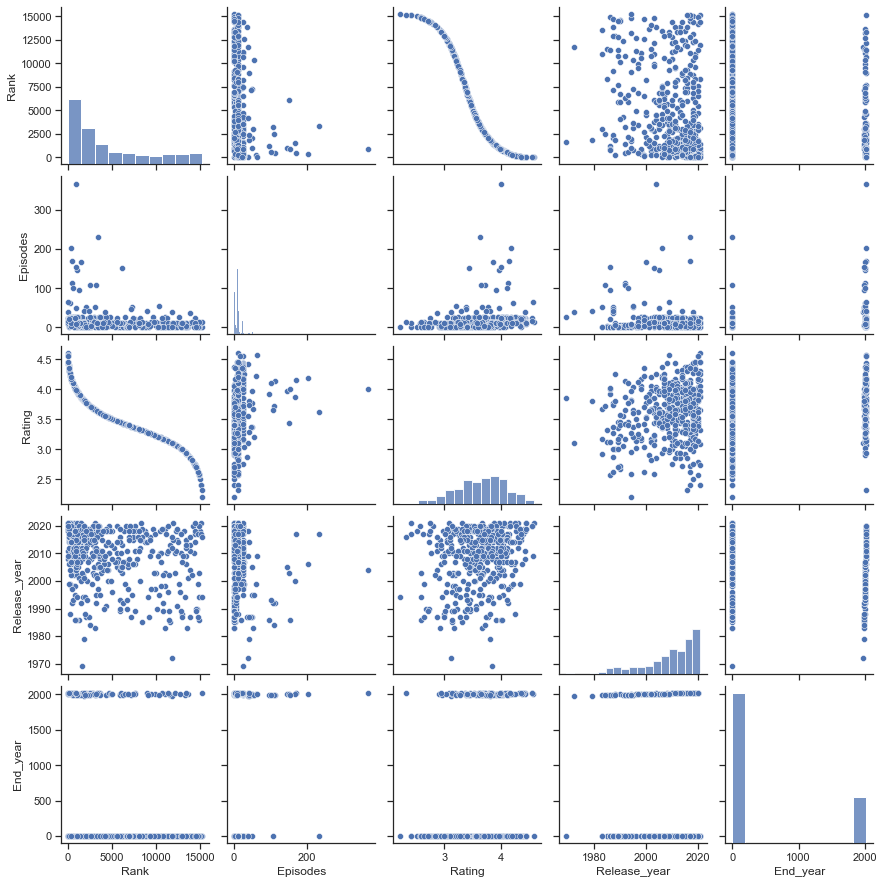

In [1194]:
sns.pairplot(train)

In [1195]:
train['Rating'].unique()

array([3.89, 2.93, 4.05, 2.91, 3.38, 3.95, 4.06, 3.54, 3.6 , 3.3 , 3.78,
       3.68, 3.25, 4.44, 3.55, 4.43, 4.04, 3.84, 4.13, 3.45, 3.97, 4.37,
       3.51, 3.37, 3.86, 4.33, 4.14, 4.23, 3.76, 4.18, 3.98, 3.4 , 3.09,
       3.47, 3.16, 3.43, 4.01, 3.92, 3.48, 3.13, 4.15, 4.17, 2.73, 4.11,
       2.51, 3.32, 3.42, 4.02, 2.59, 2.87, 2.68, 4.56, 3.2 , 3.11, 3.53,
       3.71, 3.14, 2.41, 3.66, 3.62, 4.2 , 4.35, 3.36, 3.26, 4.  , 3.24,
       4.3 , 3.65, 3.91, 3.33, 3.73, 2.72, 3.81, 3.93, 4.31, 3.01, 3.44,
       3.85, 2.79, 3.18, 3.15, 2.63, 4.42, 2.95, 3.49, 3.61, 4.27, 3.8 ,
       3.06, 3.87, 2.21, 3.29, 4.22, 4.19, 3.17, 4.12, 4.08, 3.58, 3.69,
       3.79, 4.39, 3.56, 2.75, 3.27, 4.1 , 2.57, 3.05, 3.83, 3.63, 2.76,
       4.07, 3.46, 2.86, 3.35, 3.57, 3.08, 3.41, 3.67, 3.22, 3.12, 4.25,
       2.58, 3.77, 3.99, 2.74, 2.62, 3.19, 2.4 , 4.26, 4.46, 3.96, 4.45,
       2.32, 3.64, 3.72, 2.92, 4.4 , 4.09, 3.74, 2.97, 4.24, 3.07, 3.04,
       3.88, 3.52, 4.38, 3.75, 4.16, 2.94, 3.23, 3.

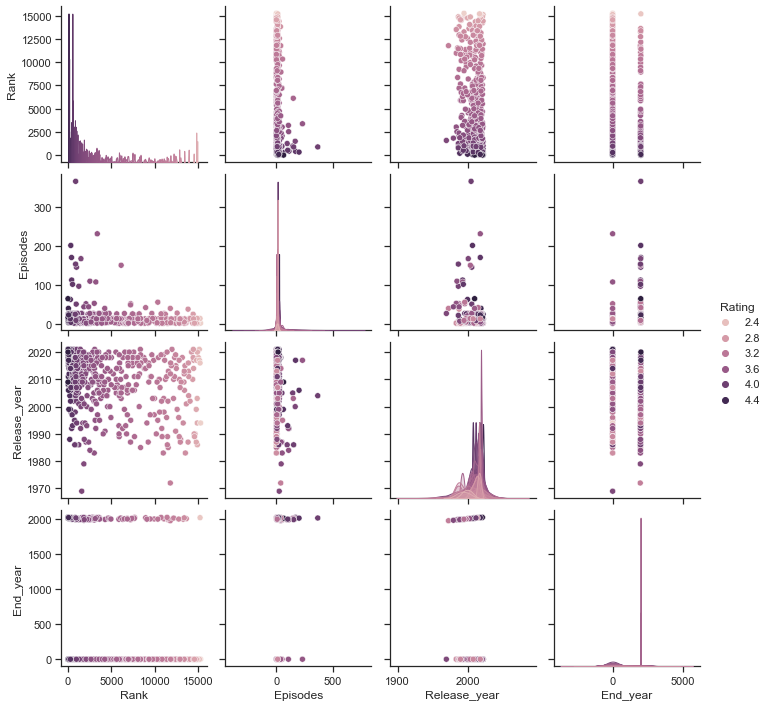

In [1196]:
sns.pairplot(train, hue="Rating")

In [1197]:
train['Rating'].value_counts()

3.86    9
4.04    8
3.45    7
3.40    7
3.98    7
       ..
2.75    1
3.79    1
4.08    1
4.22    1
3.28    1
Name: Rating, Length: 173, dtype: int64

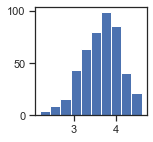

In [1198]:
fig, ax = plt.subplots(figsize=(2,2)) 
plt.hist(train['Rating'])
plt.show()

In [1199]:
thresholds = [3.5, 4.0]

# Функция для преобразования рейтинга в категорию
def categorize_rating(rating):
    if rating < thresholds[0]:
        return 'низкий'
    elif rating < thresholds[1]:
        return 'средний'
    else:
        return 'высокий'

In [1200]:
train.columns

Index(['Rank', 'Name', 'Japanese_name', 'Type', 'Episodes', 'Studio',
       'Release_season', 'Tags', 'Rating', 'Release_year', 'End_year',
       'Description', 'Content_Warning', 'Related_Mange', 'Related_anime',
       'Voice_actors', 'staff'],
      dtype='object')

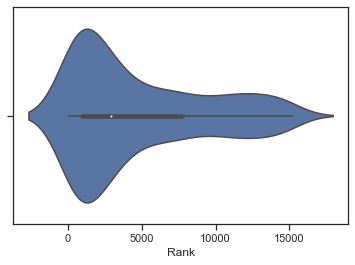

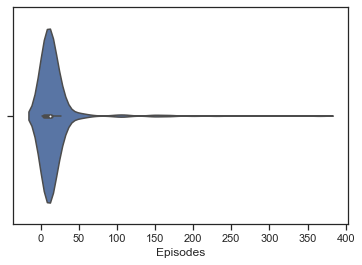

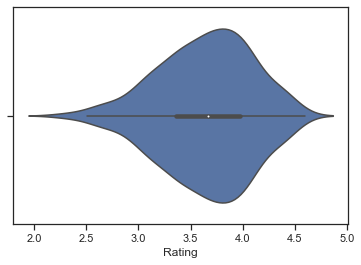

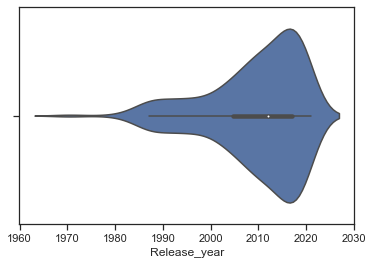

In [1201]:
for col in ['Rank', 'Episodes', 'Rating', 'Release_year']:
    sns.violinplot(x=train[col])
    plt.show()

In [1202]:
# Создадим вспомогательные колонки, 
# чтобы наборы данных можно было разделить.
train['dataset'] = 'TRAIN'
test['dataset'] = 'TEST'
sub['dataset'] = 'SUB'

In [1203]:
join_cols = ['Rating', 'Episodes', 'Release_year', 
             'Studio', 'Type', 'Release_season', 'dataset']
data_all = pd.concat([train[join_cols], test[join_cols], sub[join_cols]])
# Проверим корректность объединения
assert data_all.shape[0] == train.shape[0]+test.shape[0]+sub.shape[0]
data_all.head()

,Rating,Episodes,Release_year,Studio,Type,Release_season,dataset
1383,3.89,1,2021,A-1 Pictures,OVA,unknown,TRAIN
13456,2.93,12,2015,ARMS,TV,Fall,TRAIN
693,4.05,24,1998,Artland,OVA,unknown,TRAIN
13618,2.91,2,2001,ARMS,OVA,unknown,TRAIN
7219,3.38,51,1995,Studio DEEN,TV,Winter,TRAIN


Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения.

In [1204]:
scale_cols = ['Episodes', 'Rating', 'Release_year']
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data_all[scale_cols])
# Добавим масштабированные данные в набор данных
for i in range(len(scale_cols)):
    col = scale_cols[i]
    new_col_name = col + '_scaled'
    data_all[new_col_name] = sc1_data[:,i]

In [1205]:
data_all.head()

,Rating,Episodes,Release_year,Studio,Type,Release_season,dataset,Episodes_scaled,Rating_scaled,Release_year_scaled
1383,3.89,1,2021,A-1 Pictures,OVA,unknown,TRAIN,0.000000,0.702929,1.000000
13456,2.93,12,2015,ARMS,TV,Fall,TRAIN,0.030137,0.301255,0.884615
693,4.05,24,1998,Artland,OVA,unknown,TRAIN,0.063014,0.769874,0.557692
13618,2.91,2,2001,ARMS,OVA,unknown,TRAIN,0.002740,0.292887,0.615385
7219,3.38,51,1995,Studio DEEN,TV,Winter,TRAIN,0.136986,0.489540,0.500000


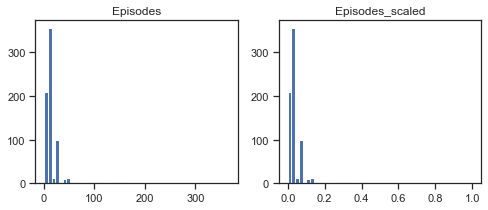

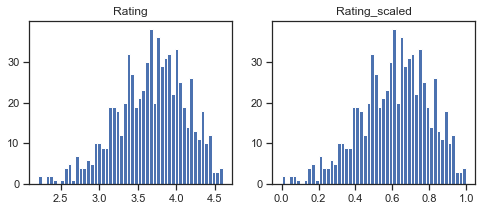

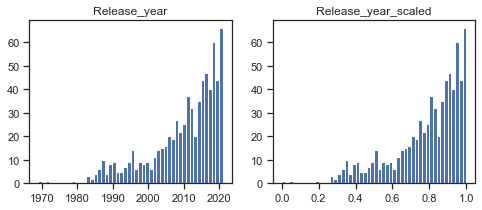

In [1206]:
# Проверим, что масштабирование не повлияло на распределение данных
for col in scale_cols:
    col_scaled = col + '_scaled'

    fig, ax = plt.subplots(1, 2, figsize=(8,3))
    ax[0].hist(data_all[col], 50)
    ax[1].hist(data_all[col_scaled], 50)
    ax[0].title.set_text(col)
    ax[1].title.set_text(col_scaled)
    plt.show()

In [1207]:
corr_cols_1 = scale_cols + ['Rating']
corr_cols_1

['Episodes', 'Rating', 'Release_year', 'Rating']

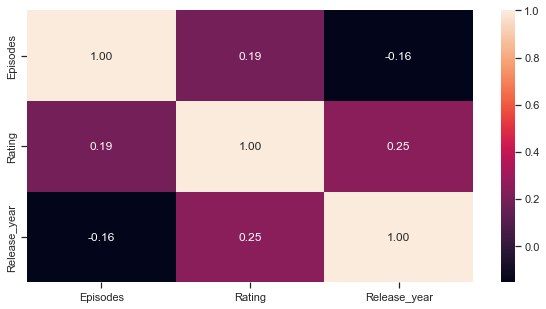

In [1208]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data_all[scale_cols].corr(), annot=True, fmt='.2f')
plt.show()

In [1209]:

train_df = pd.read_csv('train_subset.csv')
val_df = pd.read_csv('val_subset.csv')
test_df = pd.read_csv('test.csv')
train_df = train_df.dropna()
val_df = val_df.dropna()
test_df = test_df.dropna()
all_data = pd.concat([train_df, val_df, test_df])

In [1210]:

# Кодирование категориальных признаков
for col in ['Type', 'Studio', 'Release_season']:
    le = LabelEncoder()
    all_data[col] = le.fit_transform(all_data[col])

# Разделение объединенного датасета обратно на обучающий, валидационный и тестовый
train_df = all_data[:len(train_df)]
val_df = all_data[len(train_df):-len(test_df)]
test_df = all_data[-len(test_df):]

In [1211]:
# Решим задачу Классификации                                                                                                                                       ансамблевым методом машинного обучения, который комбинирует несколько решающих деревьев для получения более точных и устойчивых прогнозов.
X_train_class = train_df[['Type', 'Episodes', 'Studio', 'Release_season', 'Rating', 'Release_year', 'End_year']]
y_train_class = train_df['Content_Warning']

X_val_class = val_df[['Type', 'Episodes', 'Studio', 'Release_season', 'Rating', 'Release_year', 'End_year']]
y_val_class = val_df['Content_Warning']

X_test_class = test_df[['Type', 'Episodes', 'Studio', 'Release_season', 'Rating', 'Release_year', 'End_year']]
y_test_class = test_df['Content_Warning']
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_class, y_train_class)
val_pred_class = clf.predict(X_val_class)

print("Validation Accuracy for Classification: ", accuracy_score(y_val_class, val_pred_class))

Validation Accuracy for Classification:  0.25


In [1]:
'''
cm = confusion_matrix(y_val_class, val_pred_class)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion matrix')
plt.show()
'''


NameError: name 'confusion_matrix' is not defined

In [1213]:
#GridSearchCV с оптимальными параметрами

# Сетка параметров для поиска
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

In [1214]:
# Поиск лучших параметров для классификации
clf_grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
clf_grid.fit(X_train_class, y_train_class)
best_params_class = clf_grid.best_params_
print("Best parameters for classification: ", best_params_class)


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best parameters for classification:  {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 50}


In [1215]:
# Создание и обучение классификатора с лучшими параметрами
best_clf = RandomForestClassifier(**best_params_class, random_state=42)
best_clf.fit(X_train_class, y_train_class)
val_pred_class = best_clf.predict(X_val_class)

print("Validation Accuracy for Classification: ", accuracy_score(y_val_class, val_pred_class))

Validation Accuracy for Classification:  0.31896551724137934


In [1216]:
'''
cm = confusion_matrix(y_val_class, val_pred_class)
plt.figure(figsize=(15,12))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion matrix with best parameters')
plt.show()
'''

'\ncm = confusion_matrix(y_val_class, val_pred_class)\nplt.figure(figsize=(15,12))\nsns.heatmap(cm, annot=True, fmt="d")\nplt.xlabel(\'Predicted\')\nplt.ylabel(\'Truth\')\nplt.title(\'Confusion matrix with best parameters\')\nplt.show()\n'

In [1217]:
# Поиск лучших параметров для регрессии
reg_grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5)
reg_grid.fit(X_train_reg, y_train_reg)
best_params_reg = reg_grid.best_params_
print("Best parameters for regression: ", best_params_reg)


Best parameters for regression:  {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}


In [1218]:
# Создание и обучение регрессора с лучшими параметрами
best_reg = RandomForestRegressor(**best_params_reg, random_state=42)
best_reg.fit(X_train_reg, y_train_reg)
val_pred_reg = best_reg.predict(X_val_reg)

print("Validation MSE for Regression: ", mean_squared_error(y_val_reg, val_pred_reg))

Validation MSE for Regression:  0.13996467490338074


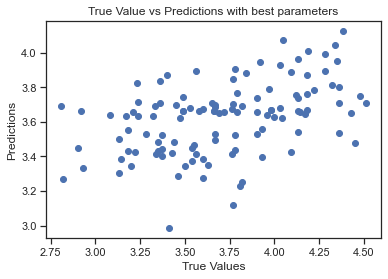

In [1219]:
plt.scatter(y_val_reg, val_pred_reg)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True Value vs Predictions with best parameters")
plt.show()

In [1220]:


# Создаем пустые списки для хранения результатов
depths = []
trees = []
accuracies = []

# Используем значения max_depth и n_estimators из сетки параметров
for max_depth in param_grid['max_depth']:
    for n_estimators in param_grid['n_estimators']:
        clf = RandomForestClassifier(max_depth=max_depth, n_estimators=n_estimators, random_state=42)
        clf.fit(X_train_class, y_train_class)
        y_pred_class = clf.predict(X_val_class)
        acc = accuracy_score(y_val_class, y_pred_class)
        
        # Добавляем результаты в списки
        depths.append(max_depth)
        trees.append(n_estimators)
        accuracies.append(acc)



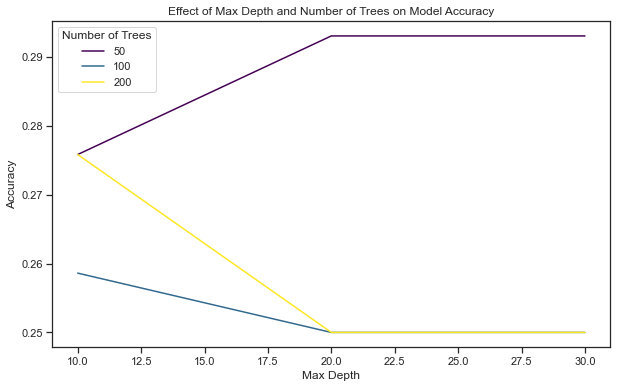

In [1221]:

# Создаем DataFrame из результатов
results_df = pd.DataFrame({'Max Depth': depths, 'Number of Trees': trees, 'Accuracy': accuracies})

# Построение графиков
plt.figure(figsize=(10, 6))
sns.lineplot(x='Max Depth', y='Accuracy', hue='Number of Trees', data=results_df, palette='viridis')
plt.title('Effect of Max Depth and Number of Trees on Model Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend(title='Number of Trees')
plt.show()

бустинг 

модель регрессии (градиентный бустинг) 

Validation MSE for XGBoost Regression:  0.16502241635632153


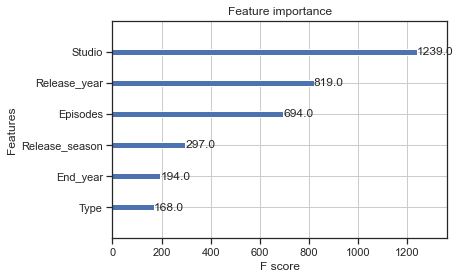

In [1222]:
from sklearn.metrics import mean_squared_error

# Обучение модели регрессии
xgb_reg = xgb.XGBRegressor(random_state=42)
xgb_reg.fit(X_train_reg, y_train_reg)

# Предсказание на валидационной выборке
val_pred_reg = xgb_reg.predict(X_val_reg)

# Вывод MSE для регрессии
print("Validation MSE for XGBoost Regression: ", mean_squared_error(y_val_reg, val_pred_reg))

# Вывод графика важности признаков
xgb.plot_importance(xgb_reg)
plt.show()


StackingRegressor 

In [1223]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor


# Заполнение пропущенных значений
imputer = SimpleImputer(strategy='most_frequent')
df_filled = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Кодирование категориальных признаков
le = LabelEncoder()
for col in df_filled.select_dtypes(include=['object']):
    df_filled[col] = le.fit_transform(df_filled[col])

# Разделение на признаки и целевую переменную
X = df_filled.drop('Rating', axis=1)
y = df_filled['Rating'].astype(float) # Убедитесь, что целевой столбец вещественный

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Определение базовых моделей
base_models = [
               ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
               ('gb', GradientBoostingRegressor(n_estimators=100, random_state=42)),
               ('svr', SVR(C=1, gamma=1))
              ]

# Определение мета-модели
meta_model = LinearRegression()

# Определение стекинг-модели
stacking_model = StackingRegressor(estimators=base_models, final_estimator=meta_model)

# Обучение стекинг-модели
stacking_model.fit(X_train, y_train)

# Предсказание
y_pred = stacking_model.predict(X_test)

# Оценка
print("Test R^2 Score : ", stacking_model.score(X_test, y_test))
mse = mean_squared_error(y_test, y_pred)
print("Test MSE : ", mse)

Test R^2 Score :  0.9998620929896888
Test MSE :  0.2767336849229376


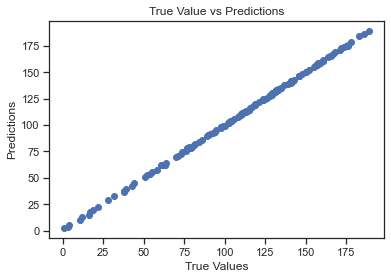

In [1224]:
# Визуализация результата
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True Value vs Predictions")
plt.show()

In [1225]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# Кодирование категориальных признаков
le = LabelEncoder()
for col in df.select_dtypes(include=['object']):
    df[col] = le.fit_transform(df[col])




In [1226]:
# Замена пропущенных значений
imputer = SimpleImputer(strategy='most_frequent')
df_filled = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Стандартизация признаков
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_filled)

# Применение PCA
pca = PCA(n_components=2)  # указание количества компонент для сохранения
df_pca = pca.fit_transform(df_scaled)

# Преобразование результатов PCA в DataFrame
df_pca = pd.DataFrame(data=df_pca, columns=['PC1', 'PC2'])

print(df_pca)

          PC1       PC2
0   -0.802468  2.154152
1   -1.463627  3.283704
2   -0.029338  3.475062
3   -1.994449  1.852348
4   -0.295214  3.604452
..        ...       ...
716  1.534405 -3.898991
717  1.100121 -3.696151
718  3.960314  1.049198
719  4.942555 -0.956000
720  4.971278 -0.706281

[721 rows x 2 columns]


МГУА

Test MSE :  0.06859602103448278


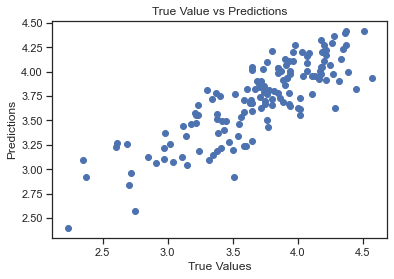

In [1227]:

# Разделение на признаки и целевую переменную
X = df_pca
y = df_filled['Rating'].astype(float) # убедитесь, что целевой столбец вещественный

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Определение модели
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Обучение модели
model.fit(X_train, y_train)

# Предсказание
y_pred = model.predict(X_test)

# Оценка MSE
mse = mean_squared_error(y_test, y_pred)
print("Test MSE : ", mse)

# Визуализация результата
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True Value vs Predictions")
plt.show()
